In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
results =pd.read_csv("/content/results.csv")
races = pd.read_csv("/content/races.csv")
drivers = pd.read_csv("/content/drivers.csv")
constructors = pd.read_csv("/content/constructors.csv")
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [3]:
#merge
df=pd.merge(results,races[['raceId','year','name','round']],on='raceId',how='left')
df=pd.merge(df,drivers[['driverId','driverRef','nationality']],on='driverId',how='left')
df=pd.merge(df,constructors[['constructorId','name','nationality']],on="constructorId",how='left')
df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'name_x', 'round', 'driverRef',
       'nationality_x', 'name_y', 'nationality_y'],
      dtype='object')

In [4]:
#drop

df.drop(['number','position','positionText','laps','fastestLap','statusId','resultId','raceId','driverId','constructorId'],axis=1,inplace=True)

In [5]:
df.rename(columns={'rank':'fastest_lap_rank','name_x':'gp_name','nationality_x':'driver_nationality','name_y':'constructor_name','nationality_y':'constructor_nationality','driverRef':'driver'},inplace=True)

In [6]:
df=df[['year','gp_name','round','driver','constructor_name','grid','positionOrder','points','time','milliseconds','fastest_lap_rank','fastestLapTime',
        'fastestLapSpeed','driver_nationality','constructor_nationality']]

In [7]:
df.tail(20)

,year,gp_name,round,driver,constructor_name,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality,constructor_nationality
24660,2020,Hungarian Grand Prix,3,hamilton,Mercedes,1,1,26.0,1:36:12.473,5772473,1,1:16.627,205.823,British,German
24661,2020,Hungarian Grand Prix,3,max_verstappen,Red Bull,7,2,18.0,+8.702,5781175,4,1:19.184,199.176,Dutch,Austrian
24662,2020,Hungarian Grand Prix,3,bottas,Mercedes,2,3,15.0,+9.452,5781925,2,1:17.665,203.072,Finnish,German
24663,2020,Hungarian Grand Prix,3,stroll,Racing Point,3,4,12.0,+57.579,5830052,3,1:18.973,199.708,Canadian,British
24664,2020,Hungarian Grand Prix,3,albon,Red Bull,13,5,10.0,+1:18.316,5850789,5,1:19.440,198.534,Thai,Austrian
24665,2020,Hungarian Grand Prix,3,vettel,Ferrari,5,6,8.0,\N,\N,14,1:20.363,196.254,German,Italian
24666,2020,Hungarian Grand Prix,3,perez,Racing Point,4,7,6.0,\N,\N,10,1:20.090,196.923,Mexican,British
24667,2020,Hungarian Grand Prix,3,ricciardo,Renault,11,8,4.0,\N,\N,7,1:19.532,198.305,Australian,French
24668,2020,Hungarian Grand Prix,3,sainz,McLaren,9,9,2.0,\N,\N,15,1:20.477,195.976,Spanish,British
24669,2020,Hungarian Grand Prix,3,kevin_magnussen,Haas F1 Team,16,10,1.0,\N,\N,6,1:19.457,198.492,Danish,American


In [8]:
#drop final season
df=df[df['year']!=2020]

In [9]:
#sort
df=df.sort_values(by=['year','round','positionOrder'],ascending=[False,True,True])

In [10]:
df.time.replace('\\N',np.nan,inplace=True)
df.milliseconds.replace('\\N',np.nan,inplace=True)
df.fastest_lap_rank.replace('\\N',np.nan,inplace=True)
df.fastestLapTime.replace('\\N',np.nan,inplace=True)
df.fastestLapSpeed.replace('\\N',np.nan,inplace=True)

In [11]:
#change datatype
df.milliseconds=df.milliseconds.astype(float)
df.fastest_lap_rank=df.fastest_lap_rank.astype(float)
df.fastestLapSpeed=df.fastestLapSpeed.astype(float)

In [12]:
#reset index
df.reset_index(drop=True,inplace=True)

In [13]:
df.shape

(24620, 15)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24620 entries, 0 to 24619
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     24620 non-null  int64  
 1   gp_name                  24620 non-null  object 
 2   round                    24620 non-null  int64  
 3   driver                   24620 non-null  object 
 4   constructor_name         24620 non-null  object 
 5   grid                     24620 non-null  int64  
 6   positionOrder            24620 non-null  int64  
 7   points                   24620 non-null  float64
 8   time                     6401 non-null   object 
 9   milliseconds             6400 non-null   float64
 10  fastest_lap_rank         6371 non-null   float64
 11  fastestLapTime           6222 non-null   object 
 12  fastestLapSpeed          6222 non-null   float64
 13  driver_nationality       24620 non-null  object 
 14  constructor_nationalit

In [15]:
df.head(21)

,year,gp_name,round,driver,constructor_name,grid,positionOrder,points,time,milliseconds,fastest_lap_rank,fastestLapTime,fastestLapSpeed,driver_nationality,constructor_nationality
0,2019,Australian Grand Prix,1,bottas,Mercedes,2,1,26.0,1:25:27.325,5127325.0,1.0,1:25.580,223.075,Finnish,German
1,2019,Australian Grand Prix,1,hamilton,Mercedes,1,2,18.0,+20.886,5148211.0,2.0,1:26.057,221.839,British,German
2,2019,Australian Grand Prix,1,max_verstappen,Red Bull,4,3,15.0,+22.520,5149845.0,3.0,1:26.256,221.327,Dutch,Austrian
3,2019,Australian Grand Prix,1,vettel,Ferrari,3,4,12.0,+57.109,5184434.0,8.0,1:27.954,217.054,German,Italian
4,2019,Australian Grand Prix,1,leclerc,Ferrari,5,5,10.0,+58.203,5185528.0,4.0,1:26.926,219.621,Monegasque,Italian
5,2019,Australian Grand Prix,1,kevin_magnussen,Haas F1 Team,7,6,8.0,+1:27.156,5214481.0,9.0,1:28.182,216.493,Danish,American
6,2019,Australian Grand Prix,1,hulkenberg,Renault,11,7,6.0,NaN,NaN,12.0,1:28.444,215.851,German,French
7,2019,Australian Grand Prix,1,raikkonen,Alfa Romeo,9,8,4.0,NaN,NaN,11.0,1:28.270,216.277,Finnish,Italian
8,2019,Australian Grand Prix,1,stroll,Racing Point,16,9,2.0,NaN,NaN,7.0,1:27.568,218.011,Canadian,British
9,2019,Australian Grand Prix,1,kvyat,Toro Rosso,15,10,1.0,NaN,NaN,6.0,1:27.448,218.310,Russian,Italian


In [16]:
sb.set_palette('Set3')
plt.rcParams['figure.figsize']=10,6

([], [])

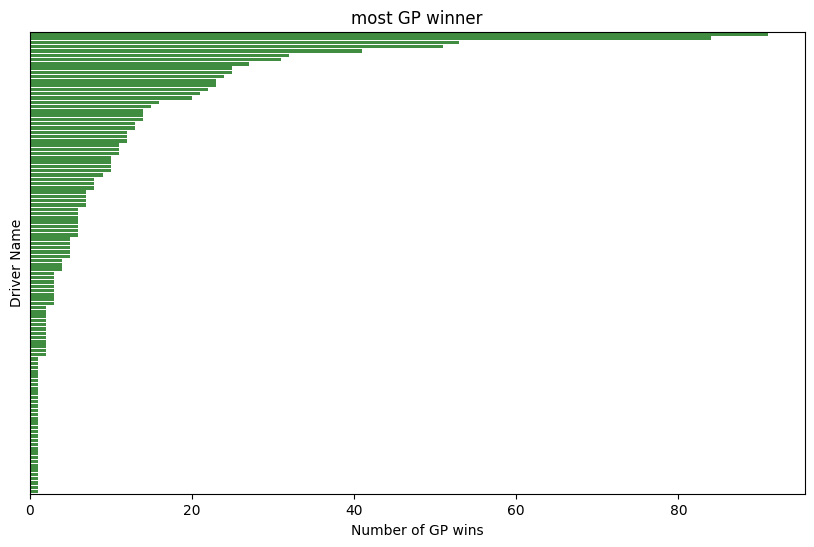

In [17]:
#GP winners
driver_winner=df.loc[df['positionOrder']==1].groupby('driver')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

#plot
sb.barplot(data=driver_winner,y='driver',x='positionOrder',color='green',alpha=0.8)
plt.title("most GP winner")
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins')
plt.yticks([])

In [18]:
#top10 point scorers
top10drivers=driver_winner.head(10)
top10drivers

,driver,positionOrder
0,michael_schumacher,91
1,hamilton,84
2,vettel,53
3,prost,51
4,senna,41
5,alonso,32
6,mansell,31
7,stewart,27
8,clark,25
9,lauda,25


Text(0.5, 0, 'Number of GP wins')

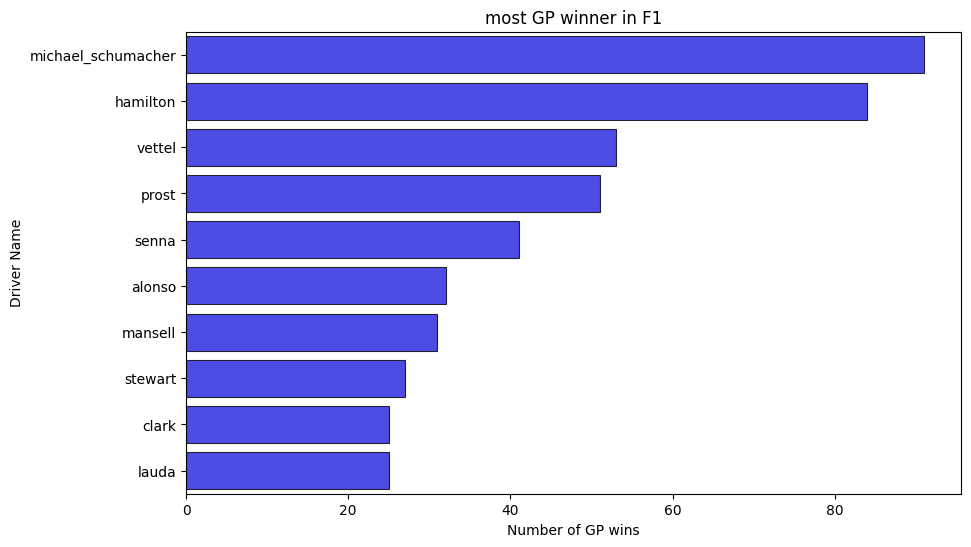

In [19]:
#top 10 plot

sb.barplot(data=top10drivers,y='driver',x='positionOrder',color='blue',alpha=0.8,linewidth=0.8,edgecolor='black')
plt.title("most GP winner in F1")
plt.ylabel('Driver Name')
plt.xlabel('Number of GP wins')

([], [])

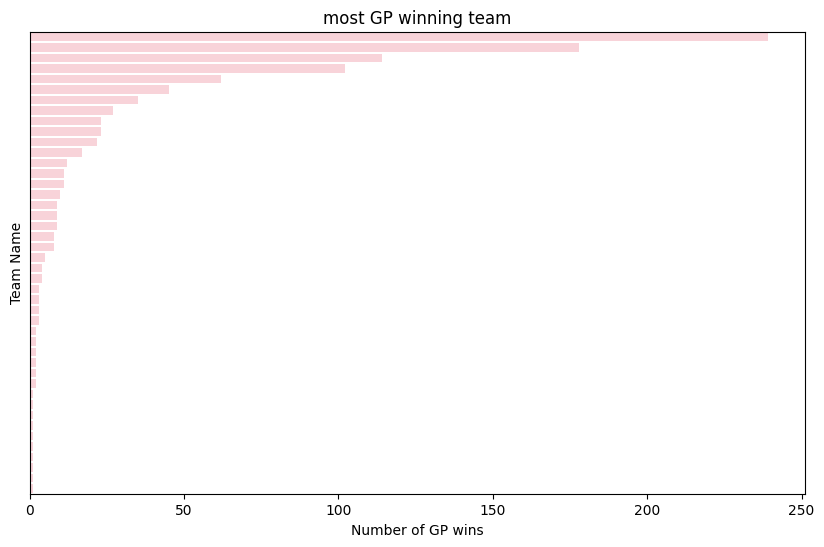

In [20]:
#constructors plot
constructor_winner=df.loc[df['positionOrder']==1].groupby('constructor_name')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

#plot
sb.barplot(data=constructor_winner,y='constructor_name',x='positionOrder',color='pink',alpha=0.8)
plt.title("most GP winning team")
plt.ylabel('Team Name')
plt.xlabel('Number of GP wins')
plt.yticks([])

In [21]:
#top10 constructor
top10constructors=constructor_winner.head(10)
top10constructors

,constructor_name,positionOrder
0,Ferrari,239
1,McLaren,178
2,Williams,114
3,Mercedes,102
4,Red Bull,62
5,Team Lotus,45
6,Renault,35
7,Benetton,27
8,Brabham,23
9,Tyrrell,23


Text(0.5, 0, 'Number of GP wins')

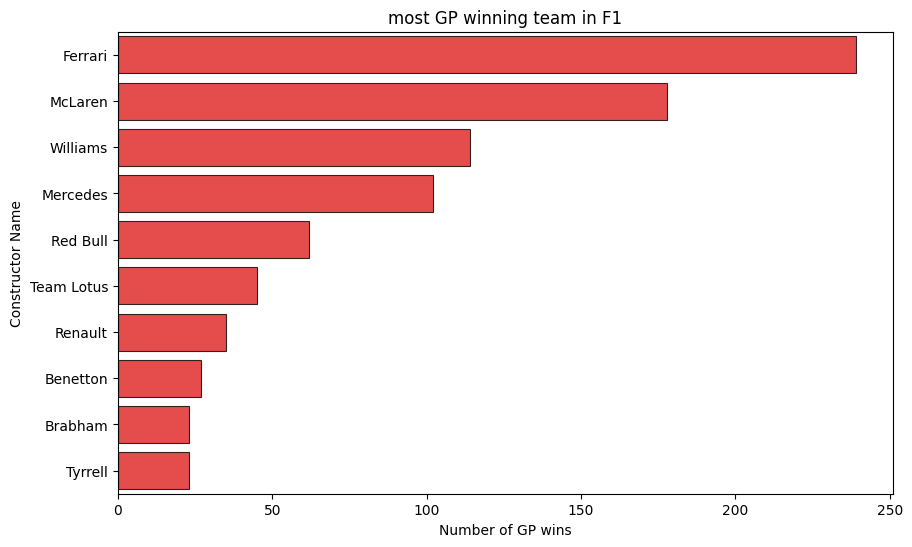

In [22]:
#top 10 constructor plot

sb.barplot(data=top10constructors,y='constructor_name',x='positionOrder',color='red',alpha=0.8,linewidth=0.8,edgecolor='black')
plt.title("most GP winning team in F1")
plt.ylabel('Constructor Name')
plt.xlabel('Number of GP wins')

Text(0.5, 0, 'starting position')

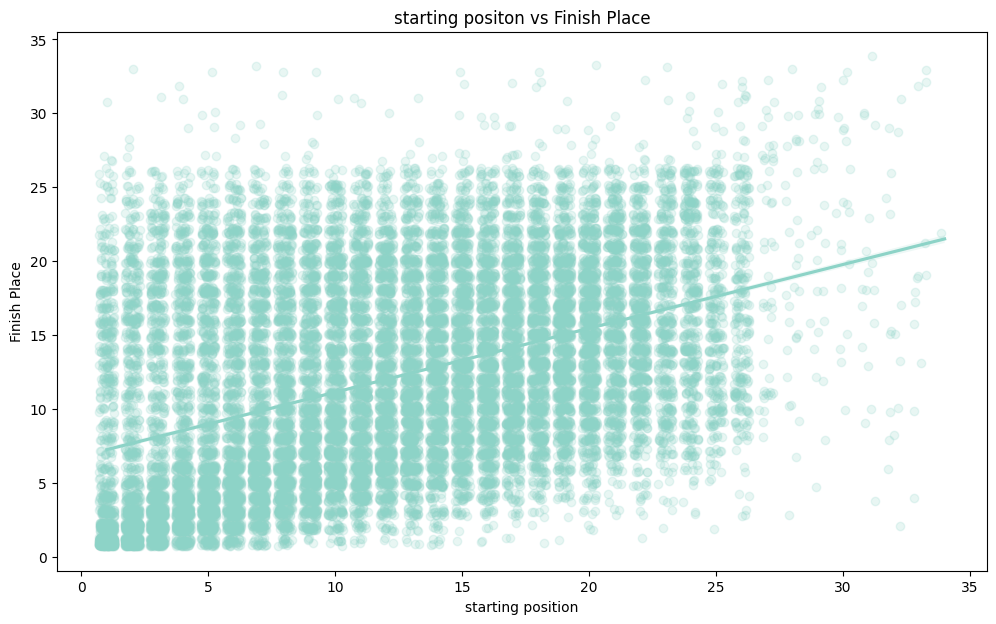

In [23]:
df_no_zero=df[df['grid']!=0]

plt.figure(figsize = [12,7])
sb.regplot(data = df_no_zero,x='grid',y='positionOrder',x_jitter=0.3,y_jitter=0.3,scatter_kws={'alpha':1/5});
plt.title('starting positon vs Finish Place')
plt.ylabel('Finish Place')
plt.xlabel('starting position')


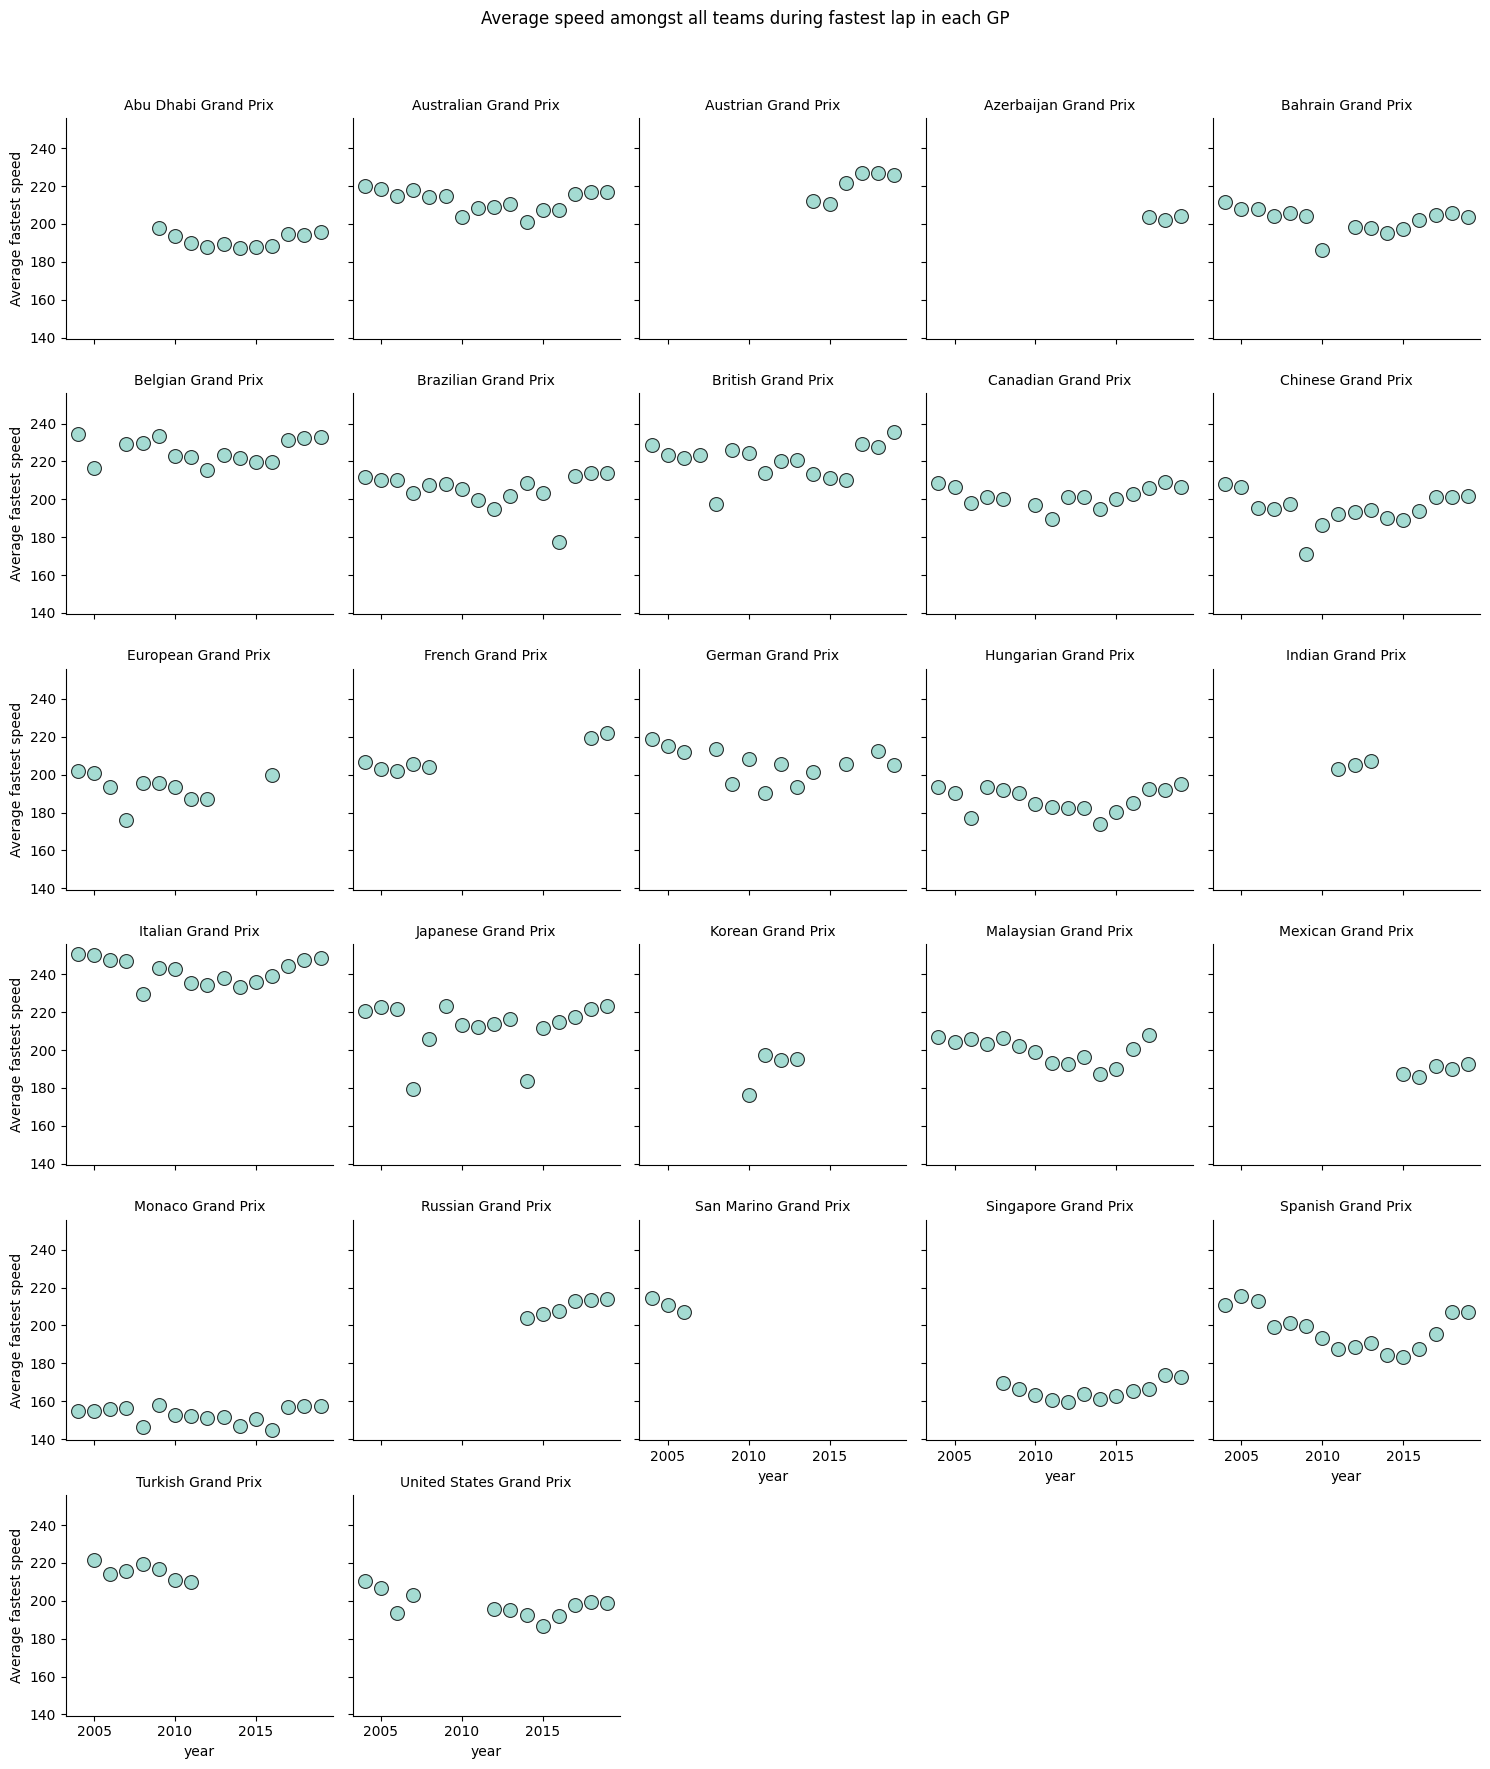

In [26]:
df_speed =df[df['year']>=2004]
df_group_speed=df_speed.groupby(['gp_name','year'])['fastestLapSpeed'].mean().to_frame().reset_index()

g=sb.FacetGrid(data =df_group_speed,col='gp_name',col_wrap=5)

g.map(plt.scatter,'year','fastestLapSpeed',alpha=0.8,linewidth=0.8,edgecolor='black',s=100)
g.set_titles('{col_name}')
g.set_xlabels('year')
g.set_ylabels('Average fastest speed')
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Average speed amongst all teams during fastest lap in each GP');
